In [2]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d mayankpatel14/second-hand-used-cars-data-set-linear-regression

Saving kaggle.json to kaggle.json
  0% 0.00/24.3k [00:00<?, ?B/s]
100% 24.3k/24.3k [00:00<00:00, 20.8MB/s]


In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df=pd.read_csv('/content/second-hand-used-cars-data-set-linear-regression.zip')

In [5]:
df.head(10)

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5
5,6,650007,844846,6,148846,2,9,13,138,61,109,177933.5
6,7,633344,756063,5,78025,1,9,15,171,94,132,410877.0
7,8,662990,891569,6,76546,1,2,12,146,109,96,467471.5
8,9,543184,841354,7,57662,4,7,14,151,50,132,462397.5
9,10,573043,879481,2,132347,2,3,12,200,115,82,197266.0


In [6]:
df.shape

(1000, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


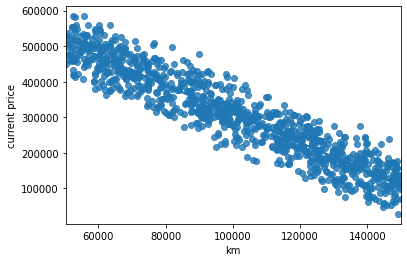

In [8]:
ax=sns.regplot(x='km',y='current price',data=df)

In [70]:
x=df[['on road old','on road now','years','km','rating','condition','economy','top speed','hp','torque']]
y=df['current price']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101)

In [75]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
model=keras.Sequential([keras.layers.Dense(units=1,input_shape=[10,])])
model.compile(optimizer=Adam(0.1),loss='mean_squared_error')
model.fit(x_train,y_train,epochs=30)

Epoch 1/30
21/21 [==============================] - 0s 1ms/step - loss: 25019000832.0000
Epoch 2/30
21/21 [==============================] - 0s 1ms/step - loss: 10408118272.0000
Epoch 3/30
21/21 [==============================] - 0s 1ms/step - loss: 6880315392.0000
Epoch 4/30
21/21 [==============================] - 0s 1ms/step - loss: 4032504064.0000
Epoch 5/30
21/21 [==============================] - 0s 1ms/step - loss: 2244429568.0000
Epoch 6/30
21/21 [==============================] - 0s 1ms/step - loss: 1281277696.0000
Epoch 7/30
21/21 [==============================] - 0s 1ms/step - loss: 728315136.0000
Epoch 8/30
21/21 [==============================] - 0s 1ms/step - loss: 475545856.0000
Epoch 9/30
21/21 [==============================] - 0s 1ms/step - loss: 346816448.0000
Epoch 10/30
21/21 [==============================] - 0s 1ms/step - loss: 290481120.0000
Epoch 11/30
21/21 [==============================] - 0s 1ms/step - loss: 270368000.0000
Epoch 12/30
21/21 [==============

In [80]:
print(model.predict([[691388,811335,6,61559,3,9,12,160,53,105]]))

[[509656.6]]


In [81]:
print('Coefficients: \n', model.get_weights())

Coefficients: 
 [array([[ 0.4955149 ],
       [ 0.508486  ],
       [-1.9877422 ],
       [-3.988714  ],
       [ 1.8791087 ],
       [13.961014  ],
       [-0.40332636],
       [-0.7611344 ],
       [-0.3840085 ],
       [ 0.76089156]], dtype=float32), array([0.07564081], dtype=float32)]


In [82]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_prediction=model.predict(x_test)
print(r2_score(y_prediction,y_test))
print(mean_absolute_error(y_prediction,y_test))
print(mean_squared_error(y_prediction,y_test))

0.9839624945264651
10959.66885653409
253572551.26045704


Text(0, 0.5, 'Y Predicted')

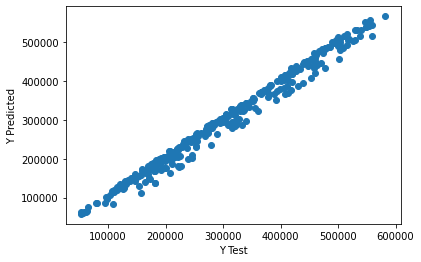

In [83]:
plt.scatter(y_test,y_prediction)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')